In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('bank.csv', delimiter = ';', quoting = 3)
df=df.dropna(how='any')
df

,"""age""","""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",442,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [24]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
df['"age"']=le1.fit_transform(df['"age"'])
df['"job"']=le1.fit_transform(df['"job"'])
df['"marital"']=le1.fit_transform(df['"marital"'])
df['"education"']=le1.fit_transform(df['"education"'])
df['"default"']=le1.fit_transform(df['"default"'])
df['"housing"']=le1.fit_transform(df['"housing"'])
df['"loan"']=le1.fit_transform(df['"loan"'])
df['"contact"']=le1.fit_transform(df['"contact"'])
df['"month"']=le1.fit_transform(df['"month"'])
df['"day_of_week"']=le1.fit_transform(df['"day_of_week"'])
df['"duration"']=le1.fit_transform(df['"duration"'])
df['"campaign"']=le1.fit_transform(df['"campaign"'])
df['"pdays"']=le1.fit_transform(df['"pdays"'])
df['"previous"']=le1.fit_transform(df['"previous"'])
df['"poutcome"']=le1.fit_transform(df['"poutcome"'])
df['"emp.var.rate"']=le1.fit_transform(df['"emp.var.rate"'])
df['"cons.price.idx"']=le1.fit_transform(df['"cons.price.idx"'])
df['"cons.conf.idx"']=le1.fit_transform(df['"cons.conf.idx"'])
df['"euribor3m"']=le1.fit_transform(df['"euribor3m"'])
df['"nr.employed"']=le1.fit_transform(df['"nr.employed"'])
df['"y"']=le2.fit_transform(df['"y"'])
df

,"""age""","""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,334,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,442,0,26,0,1,5,25,0,171,0,1


In [25]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
import tensorflow as tf

In [29]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [31]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=ann.fit(X_train, y_train, batch_size=15, epochs=150)
ann.save("Bank.h5")

Epoch 1/150
2060/2060 [==============================] - 3s 1ms/step - loss: 0.2081 - accuracy: 0.9059
Epoch 2/150
2060/2060 [==============================] - 2s 1ms/step - loss: 0.2004 - accuracy: 0.9094
Epoch 3/150
2060/2060 [==============================] - 2s 1ms/step - loss: 0.1955 - accuracy: 0.9082
Epoch 4/150
2060/2060 [==============================] - 2s 1ms/step - loss: 0.1924 - accuracy: 0.9121
Epoch 5/150
2060/2060 [==============================] - 2s 1ms/step - loss: 0.1897 - accuracy: 0.9108
Epoch 6/150
2060/2060 [==============================] - 2s 1ms/step - loss: 0.1942 - accuracy: 0.9072
Epoch 7/150
2060/2060 [==============================] - 2s 1ms/step - loss: 0.1958 - accuracy: 0.9082
Epoch 8/150
2060/2060 [==============================] - 2s 1ms/step - loss: 0.1960 - accuracy: 0.9079
Epoch 9/150
2060/2060 [==============================] - 2s 1ms/step - loss: 0.1920 - accuracy: 0.9091
Epoch 10/150
2060/2060 [==============================] - 2s 1ms/step - l

Saved Model & Graph to disk


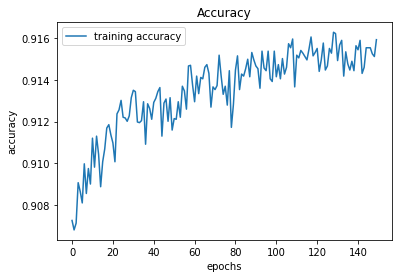

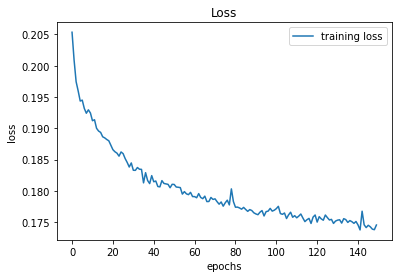

In [33]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

In [36]:
y_pred = ann.predict(X_test)
y_pred=np.round(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8820  319]
 [ 541  617]]


0.9164805283092162